<a href="https://colab.research.google.com/github/fiqihyusrilm/Machine-Learning/blob/main/SKLearn_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files


uploaded = files.upload()

import pandas as pd
import io

data = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))
print(data)

Saving Mall_Customers.csv to Mall_Customers.csv
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [2]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df  = data.rename(columns={'Gender' : 'gender', 'Age' : 'age',
                           'Annual Income (k$)' : 'annual_income',
                           'Spending Score (1-100)': 'spending_score'})

In [4]:
df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# ubah data kategorik ke numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

In [6]:
df['gender']

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: gender, Length: 200, dtype: int64

In [7]:
df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [8]:
df1 = df.copy()

In [9]:
X = df.drop(columns=['CustomerID', 'gender'], axis=1)

In [10]:
X.head()

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [13]:
# inertia
from sklearn.cluster import KMeans
# list inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0, 0.5, 'Inertia')

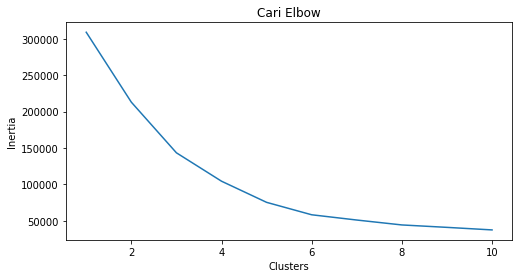

In [15]:
# plot inertia
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [16]:
# buat object k-means
km5 = KMeans(n_clusters=5).fit(X)

In [17]:
# add kolom label
X['Labels'] = km5.labels_

In [18]:
X.head()

,age,annual_income,spending_score,Labels
0,19,15,39,3
1,21,15,81,0
2,20,16,6,3
3,23,16,77,0
4,31,17,40,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


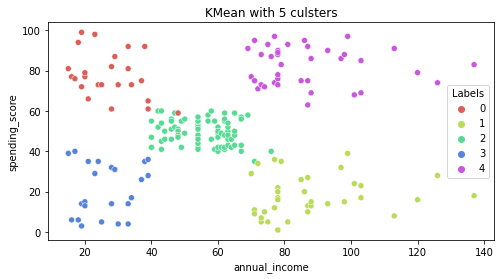

In [26]:
# plot KMeans 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMean with 5 culsters')
plt.show()